In [1]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [2]:
stock = yf.Ticker("AAPL")
stock = stock.history(period='2y')


In [3]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-08 00:00:00-04:00,164.737309,166.163180,162.588606,163.252029,60276900,0.0,0.0
2022-08-09 00:00:00-04:00,162.410382,164.192721,161.647935,163.301544,63135500,0.0,0.0
2022-08-10 00:00:00-04:00,166.034459,167.678172,165.262115,167.579163,70170500,0.0,0.0
2022-08-11 00:00:00-04:00,168.391087,169.311968,166.539443,166.836502,57149200,0.0,0.0
2022-08-12 00:00:00-04:00,168.153448,170.480377,167.737557,170.411072,68039400,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-31 00:00:00-04:00,221.440002,223.820007,220.630005,222.080002,50036300,0.0,0.0
2024-08-01 00:00:00-04:00,224.369995,224.479996,217.020004,218.360001,62501000,0.0,0.0
2024-08-02 00:00:00-04:00,219.149994,225.600006,217.710007,219.860001,105568600,0.0,0.0


In [4]:
del stock['Dividends']
del stock['Stock Splits']

In [5]:
stock

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-08 00:00:00-04:00,164.737309,166.163180,162.588606,163.252029,60276900
2022-08-09 00:00:00-04:00,162.410382,164.192721,161.647935,163.301544,63135500
2022-08-10 00:00:00-04:00,166.034459,167.678172,165.262115,167.579163,70170500
2022-08-11 00:00:00-04:00,168.391087,169.311968,166.539443,166.836502,57149200
2022-08-12 00:00:00-04:00,168.153448,170.480377,167.737557,170.411072,68039400
...,...,...,...,...,...
2024-07-31 00:00:00-04:00,221.440002,223.820007,220.630005,222.080002,50036300
2024-08-01 00:00:00-04:00,224.369995,224.479996,217.020004,218.360001,62501000
2024-08-02 00:00:00-04:00,219.149994,225.600006,217.710007,219.860001,105568600


<Axes: xlabel='Date'>

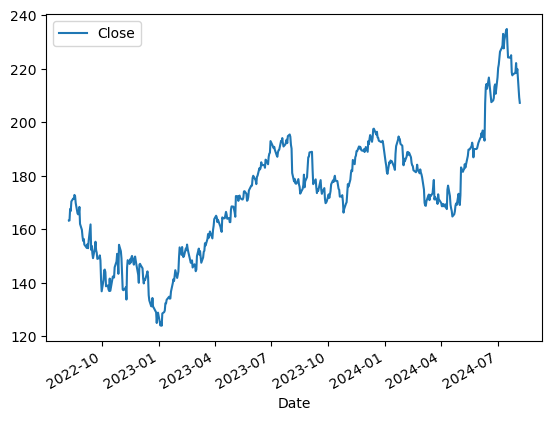

In [6]:
stock.plot.line(y="Close")

In [7]:
stock["Next Days Close"] = stock['Close'].shift(-1)

In [8]:
stock

,Open,High,Low,Close,Volume,Next Days Close
Date,,,,,,
2022-08-08 00:00:00-04:00,164.737309,166.163180,162.588606,163.252029,60276900,163.301544
2022-08-09 00:00:00-04:00,162.410382,164.192721,161.647935,163.301544,63135500,167.579163
2022-08-10 00:00:00-04:00,166.034459,167.678172,165.262115,167.579163,70170500,166.836502
2022-08-11 00:00:00-04:00,168.391087,169.311968,166.539443,166.836502,57149200,170.411072
2022-08-12 00:00:00-04:00,168.153448,170.480377,167.737557,170.411072,68039400,171.490372
...,...,...,...,...,...,...
2024-07-31 00:00:00-04:00,221.440002,223.820007,220.630005,222.080002,50036300,218.360001
2024-08-01 00:00:00-04:00,224.369995,224.479996,217.020004,218.360001,62501000,219.860001
2024-08-02 00:00:00-04:00,219.149994,225.600006,217.710007,219.860001,105568600,209.270004


In [9]:
stock['change'] = (stock['Next Days Close'] > stock['Close']).astype(int)


In [10]:
# Checking most current prices

stock.tail()

,Open,High,Low,Close,Volume,Next Days Close,change
Date,,,,,,,
2024-07-31 00:00:00-04:00,221.440002,223.820007,220.630005,222.080002,50036300,218.360001,0
2024-08-01 00:00:00-04:00,224.369995,224.479996,217.020004,218.360001,62501000,219.860001,1
2024-08-02 00:00:00-04:00,219.149994,225.600006,217.710007,219.860001,105568600,209.270004,0
2024-08-05 00:00:00-04:00,199.089996,213.500000,196.000000,209.270004,119548600,207.229996,0
2024-08-06 00:00:00-04:00,205.389999,209.979996,201.070007,207.229996,69353188,NaN,0


In [11]:
# Set up look back window for new model using LSTM (LongShortTermMemory)
# begining of new model coding

import numpy as np
def look_back_period(X, y, look_back_window=20):
    X_lstm, y_lstm, = [],[]
    for i in range(len(X)- look_back_window):
        X_lstm.append(X[i:i+look_back_window])
        y_lstm.append(y[i+look_back_window])
    return np.array(X_lstm), np.array(y_lstm)


In [12]:
# Drop rows with NaN target values
stock = stock.dropna(subset=['Next Days Close', 'change'])

#dropped 'Next Days Close' because it is not needed in new model
stock = stock.drop(columns = "Next Days Close")

# Split our preprocessed data into our features and target arrays
y = stock['change']
X = stock.drop(columns=['change'])

# Preserve the index of the original DataFrame
original_index = X.index

In [13]:
# Normalize data:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Scaling data for LSTM lookback
# Creates dataset suitable for training a model that expects a sequence of data points

X_scaled, y = look_back_period(X_scaled, y)

In [15]:
X_scaled.shape, y.shape

((481, 20, 5), (481,))

In [16]:
#split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# original code 
# Rebuild X_test DataFrame to restore index information
#X_test_df = pd.DataFrame(X_test, index=original_index[-len(X_test):], columns=X.columns)

In [ ]:
# Define the model this was original model
#model = tf.keras.models.Sequential([
#    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
#    tf.keras.layers.Dense(32, activation='relu'),
#    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
#])

In [17]:
#import LSTM for layers and Sequential for new model
# LSTM is used for time series data 

from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [18]:
X_train.shape

(384, 20, 5)

In [19]:
# using tanh activation, its better suited for stock market non-linearity
# dropout 0.2 helps with over fitting

model = Sequential()

model.add(LSTM(units=50, activation="tanh", return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))

model.add(LSTM(units=30,return_sequences=True, activation="tanh",))
model.add(Dropout(0.2))

model.add(LSTM(units=10, activation="tanh"))

model.add(Dense(1, activation="sigmoid"))


/Users/keycaughey/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=10)

Epoch 1/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5421 - loss: 0.6958 - val_accuracy: 0.4156 - val_loss: 0.7055
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5512 - loss: 0.6899 - val_accuracy: 0.4156 - val_loss: 0.7188
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5884 - loss: 0.6837 - val_accuracy: 0.4156 - val_loss: 0.7106
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5342 - loss: 0.6876 - val_accuracy: 0.4156 - val_loss: 0.7052
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5529 - loss: 0.6822 - val_accuracy: 0.4156 - val_loss: 0.7098
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5078 - loss: 0.6897 - val_accuracy: 0.5195 - val_loss: 0.6878
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5692 - loss: 0.6833 - val_accuracy: 0.4156 - val_loss: 0.7197
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4993 - loss: 0.6872 - val_accuracy: 0.4156 - 

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6718 - loss: 0.5906 - val_accuracy: 0.5065 - val_loss: 0.6954
Epoch 52/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6614 - loss: 0.6119 - val_accuracy: 0.5325 - val_loss: 0.7227
Epoch 53/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6686 - loss: 0.6063 - val_accuracy: 0.5325 - val_loss: 0.7164
Epoch 54/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6769 - loss: 0.6146 - val_accuracy: 0.5325 - val_loss: 0.6974
Epoch 55/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6591 - loss: 0.6275 - val_accuracy: 0.5065 - val_loss: 0.7094
Epoch 56/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6493 - loss: 0.6096 - val_accuracy: 0.5065 - val_loss: 0.7243
Epoch 57/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6991 - loss: 0.5916 - val_accuracy: 0.5325 - val_loss: 0.7207
Epoch 58/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6382 - loss: 0.6263 - val_accuracy: 0.4935 - val_lo

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7743 - loss: 0.4979 - val_accuracy: 0.5455 - val_loss: 0.8427
Epoch 102/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7735 - loss: 0.4976 - val_accuracy: 0.6104 - val_loss: 0.7544
Epoch 103/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7793 - loss: 0.4839 - val_accuracy: 0.5455 - val_loss: 0.8022
Epoch 104/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7662 - loss: 0.4761 - val_accuracy: 0.5974 - val_loss: 0.7394
Epoch 105/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7746 - loss: 0.4945 - val_accuracy: 0.5844 - val_loss: 0.7480
Epoch 106/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7010 - loss: 0.5620 - val_accuracy: 0.5974 - val_loss: 0.7670
Epoch 107/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8149 - loss: 0.4256 - val_accuracy: 0.5195 - val_loss: 0.8279
Epoch 108/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8024 - loss: 0.4149 - val_accuracy: 0.5974 -

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7835 - loss: 0.4143 - val_accuracy: 0.5195 - val_loss: 1.0350
Epoch 152/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8446 - loss: 0.3529 - val_accuracy: 0.5455 - val_loss: 0.9773
Epoch 153/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8543 - loss: 0.3397 - val_accuracy: 0.5714 - val_loss: 1.0341
Epoch 154/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7953 - loss: 0.4292 - val_accuracy: 0.5325 - val_loss: 1.1199
Epoch 155/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7298 - loss: 0.4675 - val_accuracy: 0.6104 - val_loss: 0.9479
Epoch 156/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7913 - loss: 0.4068 - val_accuracy: 0.5844 - val_loss: 1.0687
Epoch 157/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8603 - loss: 0.3737 - val_accuracy: 0.6104 - val_loss: 1.0817
Epoch 158/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8068 - loss: 0.4211 - val_accuracy: 0.5455 -

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {model_loss}, Test Accuracy: {model_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5642 - loss: 1.0666 
Test Loss: 0.9543986916542053, Test Accuracy: 0.5979381203651428


In [24]:
# Make predictions
predictions = model.predict(X_test).round().flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [25]:
# Create a DataFrame for predictions with the index of X_test_df

predictions_df = pd.DataFrame(predictions, columns=['Predictions'])

In [26]:
precision_score(y_test,predictions)

0.6521739130434783

In [27]:
# checking to see if model is overtrained
# Looping through epochs to get data 

train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
num_epochs = 200
x_axis = [i for i in range(num_epochs)]


In [28]:
# Importing dependencies for plot

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [29]:
# Creating function for overtrain analysis chart

def analysis_plot(x,train_data, val_data):
    plt.figure(figsize=(12,6))
    plt.plot(x,train_data,label = "train data")
    plt.plot(x,val_data, label = "val data")
    plt.legend()
    plt.plot();

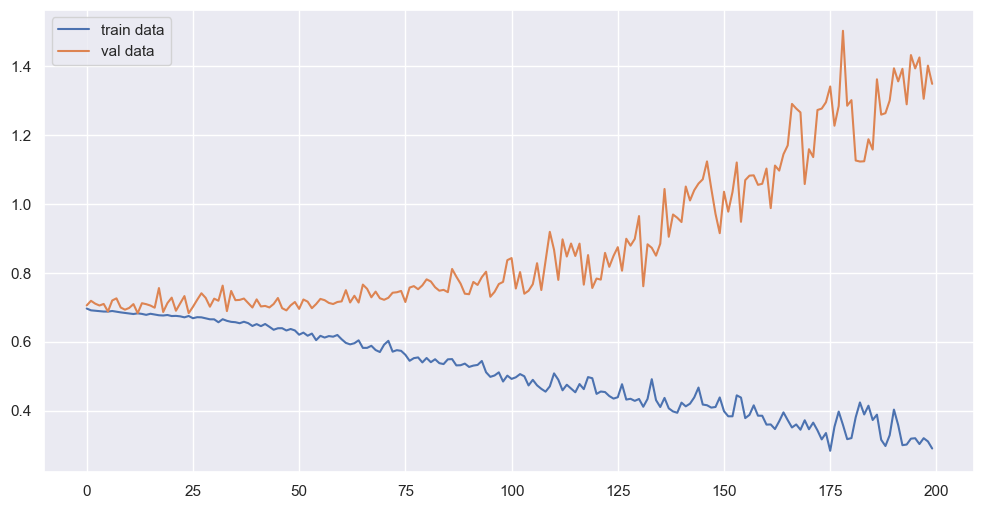

In [30]:
# Val data shows its overfitting the data 
# train data shows model is getting better at minimizing loss
analysis_plot(x=x_axis,train_data = train_loss, val_data=val_loss)

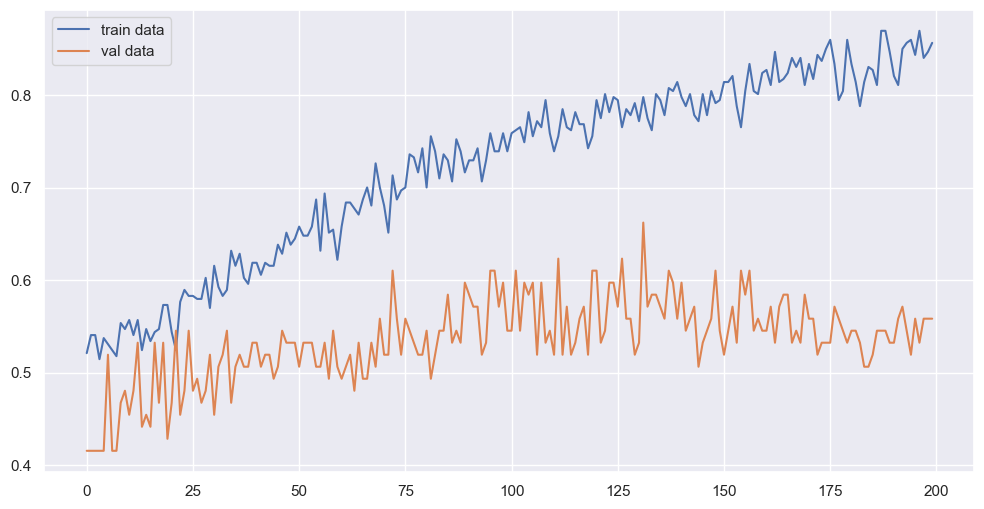

In [31]:

# Train data shows its learning and improving on the data over time
# Val data is flat , may be overfitting the data 

analysis_plot(x=x_axis,train_data = train_acc, val_data = val_acc)

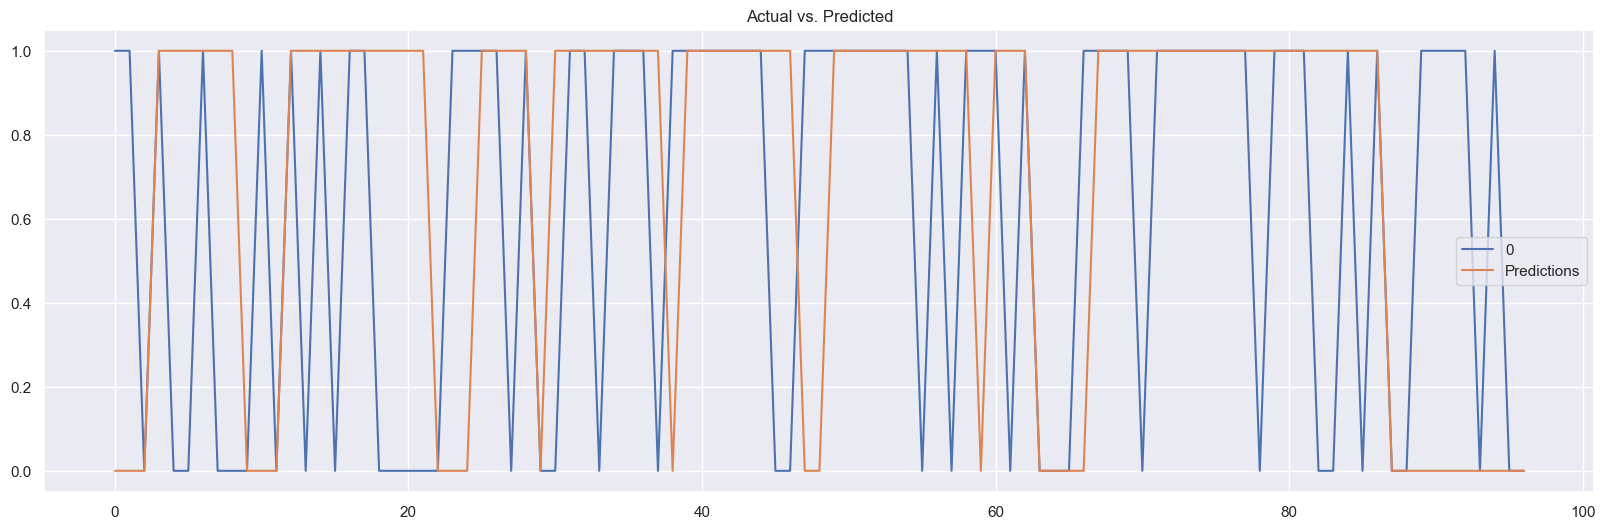

In [32]:
# Combine actual values and predictions
# Orange is predicted, Blue is actual
combined = pd.concat([pd.Series(y_test), predictions_df], axis=1)

# Plot the combined DataFrame
# plt.figure(figsize = (20,6))
combined.plot(title='Actual vs. Predicted', figsize=(20,6))
# plt.figure(figsize=(20,6))
plt.show()

In [33]:
combined.columns

Index([0, 'Predictions'], dtype='object')

In [34]:
predictions_df

,Predictions
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
92,0.0
93,0.0
94,0.0
95,0.0


In [35]:

# Prepare latest data for prediction
# Data is scaled 

look_back_window = 20  # Ensure this matches our function parameter
latest_data = X_scaled[-1].reshape(1, look_back_window, X_scaled.shape[2])
latest_data_df = pd.DataFrame(latest_data[0], columns=X.columns)

print(latest_data_df)

        Open      High       Low     Close    Volume
0   2.436240  2.394637  2.339011  2.466758 -0.265338
1   2.473629  2.463677  2.478074  2.505093 -0.712634
2   2.534610  2.627595  2.606439  2.696771 -0.121446
3   2.627639  2.596861  2.451331  2.455614 -0.036824
4   2.517696  2.607996  2.581033  2.588005 -0.510701
5   2.854201  2.812448  2.777593  2.760069 -0.121299
6   2.788325  2.769687  2.743719  2.778792 -0.909341
7   2.541287  2.555436  2.490108  2.514009 -0.336029
8   2.578231  2.510002  2.295332  2.304500  0.016966
9   2.335200  2.347866  2.340348  2.310296 -0.668943
10  2.432679  2.391518  2.331880  2.294694 -0.707527
11  2.315169  2.354102  2.313605  2.341499 -1.042354
12  2.298700  2.258781  2.066235  2.053091 -0.155983
13  2.073028  2.082837  1.954361  2.006286 -0.577951
14  2.062790  2.022259  2.016315  2.027237 -0.975685
15  1.985341  2.013795  2.004726  2.039719 -1.190582
16  2.084601  2.059674  2.021218  2.064681 -0.973959
17  2.184751  2.215129  2.222235  2.210891 -0.

In [36]:

# Prepare latest data for prediction
latest_data = stock.drop(columns=['change']).iloc[-look_back_window:]  # Get the last look_back_window rows
latest_data_scaled = scaler.transform(latest_data)  # Scale the data
latest_data_reshaped = latest_data_scaled.reshape(1, look_back_window, latest_data_scaled.shape[1])  # Reshape to (1, look_back_window, num_features)


In [37]:

# Make prediction for the next day
next_day_prediction = model.predict(latest_data_reshaped).round().flatten()[0]

# Interpret the prediction
if next_day_prediction == 1:
    print("The model predicts that the stock price will increase the next day.")
else:
    print("The model predicts that the stock price will decrease the next day.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The model predicts that the stock price will decrease the next day.


[*********************100%%**********************]  10 of 10 completed


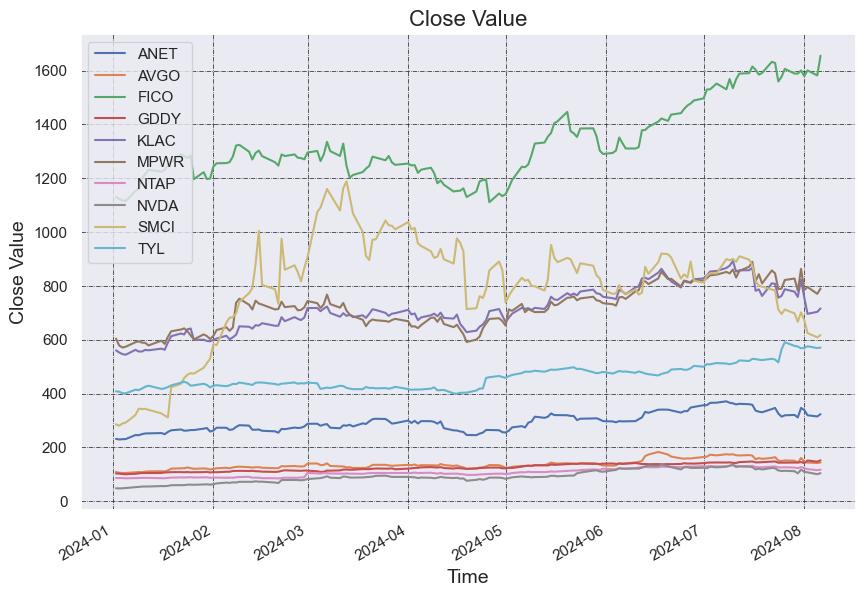

In [38]:
# Define the ticker list
import pandas as pd
tickers_list = ['SMCI', 'NVDA', 'ANET', 'NTAP', 'AVGO', 'KLAC', 'FICO', 'GDDY', 'MPWR', 'TYL']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2024-1-1')['Close']

# Plot all the close prices
((data.plot(figsize=(10, 7))))
plt.legend()
plt.title("Close Value", fontsize=16)

# Define the labels
plt.ylabel('Close Value', fontsize=14)
plt.xlabel('Time', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()